In [5]:
from pathlib import Path
from funman.api.run import Runner

%load_ext autoreload
%autoreload 2

In [6]:
# Setup Paths


RESOURCES = Path("../resources").resolve()
EXAMPLE_DIR = RESOURCES / "amr" / "petrinet" / "amr-examples"
MODEL_PATH = EXAMPLE_DIR / "sir.json"
REQUEST_PATH = EXAMPLE_DIR / "sir_request1.json"


results = Runner().run(MODEL_PATH, REQUEST_PATH, description="Basic SIR with simple request", case_out_dir="./out")

+++ True(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 1.0, 'ub': 1.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}), width = 0.08000000000000001554312234475)
+++ True(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 2.0, 'ub': 2.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}), width = 0.08000000000000001554312234475)
+++ True(Box({'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 3.0, 'ub': 3.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}), width = 0.08000000000000001554312234475)
+++ Tru

<Axes: xlabel='time'>

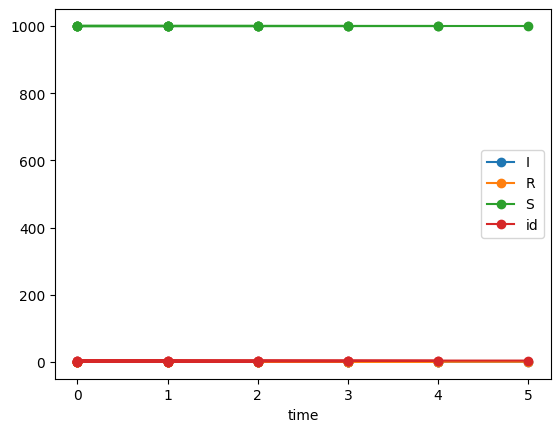

In [7]:
results.plot()

In [8]:
results.explain()

ParameterSpaceExplanation(true_explanations=[BoxExplanation(), BoxExplanation(), BoxExplanation(), BoxExplanation(), BoxExplanation()], false_explanations=[])